In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc


import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/somit/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/EcoliMG1655/EcoliGenes.csv")
# dataset = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/TyphiLT2/data.csv")
feature=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['Stress','NC']
network1=['BC','CC','CCO','DC']
features=feature+homo
features+=network+network1
# features+=add
print features
df=dataset[features]
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df['GC']=df['GC'].fillna(0)
df['GC3s']=df['GC3s'].fillna(0)
df['L_sym']=df['L_sym'].fillna(0)
df['L_aa']=df['L_aa'].fillna(0)
df['Gravy']=df['Gravy'].fillna(0)
df['Aromo']=df['Aromo'].fillna(0)
df=df[df.GC!=0]
df=df[df.DC!=0]
# le = preprocessing.LabelEncoder()
# df['#Function']=le.fit_transform(df['#Function'])
df = df.sample(frac=1).reset_index(drop=False)
df.info()
print df.head(5)
features.remove('Essentiality')
print features
X_train=df[features]
Y_train=df['Essentiality']
print X_train.head()

/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'Stress', 'NC', 'BC', 'CC', 'CCO', 'DC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3506 entries, 0 to 3505
Data columns (total 32 columns):
index           3506 non-null int64
CAI             3506 non-null float64
CBI             3506 non-null float64
Fop             3506 non-null float64
GC              3506 non-null float64
Essentiality    3506 non-null int64
GC3s            3506 non-null float64
L_sym           3506 non-null float64
L_aa            3506 non-null float64
Gravy           3506 non-null float64
Aromo           3506 non-null float64
H1              3506 non-null int64
H2              3506 non-null int64
H3              3506 non-null int64
H4              3506 non-null int64
H5              3506 non-null int64
H6              3506 non-null int64
H7              3506 non-null int64
H8              3506 non-null int64
H9              3506 non-null int64
H10             3506 non-null int64
H11             3506 non-null int64
H12             3506 non-null int64
H13             3506 non-null int64
H14        

In [3]:
# from sklearn.model_selection import train_test_split
# train, test = train_test_split(df, test_size = 0.2,random_state=23)
# print features
# X_train=train[features]
# X_train=X_train.reset_index(drop=True)
# Y_train=train['Essentiality']
# Y_train=Y_train.reset_index(drop=True)
# X_test=test[features]
# X_test=X_test.reset_index(drop=True)
# Y_test=test['Essentiality']
# Y_test=Y_test.reset_index(drop=True)
# print X_train.head(5)
# print Y_train.head(5)
# # print Y_train.shape
# # print Y_test.shape
# # X_train=df[features]
# # Y_train=df['Essentiality']

In [23]:
# X_train[X_train.dtypes[(X_train.dtypes=="float64")|(X_train.dtypes=="int64")].index.values].hist(figsize=[20,20])

In [5]:
# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# X_train=min_max.fit_transform(X_train)
# X_test=min_max.fit_transform(X_test)
# # X_train=X_train_feature
# # print X_train[:,1]

In [6]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
# X_test = scaler.transform(X_test)
# print X_train[0:5]

Time Taken =0.304133 


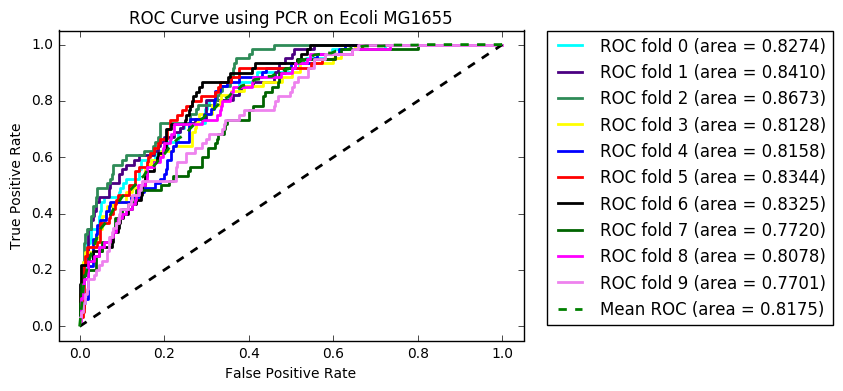

212 MB


In [7]:
from sklearn import cross_validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from scipy import interp
from itertools import cycle
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import timeit

pca = PCA()
X_train=pca.fit_transform(X_train)
clf =LinearRegression()

# clf.fit(X_train,Y_train)
# pred=clf.predict(X_test)
# print pred[0:5]


# print len(X_train)
# print Y_train.shape

#kf_total =cross_validation.KFold(len(X_train), n_folds=10,shuffle=True, random_state=4)
skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=23)
#kf=KFold(n_splits=10,shuffle=True,random_state=23)
skf.get_n_splits(X_train,Y_train)

mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)


colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])
lw = 2

i = 0

start= timeit.default_timer()
for (train, test), color in zip(skf.split(X_train,Y_train), colors):
    probas_ = clf.fit(X_train[train],Y_train[train]).predict(X_train[test])
            
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(Y_train[test], probas_)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,label='ROC fold %d (area = %0.4f)' % (i, roc_auc))
    i += 1
    
stop = timeit.default_timer()
print "Time Taken =%f " %(stop-start)

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k')

mean_tpr /= skf.get_n_splits(X_train,Y_train)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',label='Mean ROC (area = %0.4f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Ecoli MG1655')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

In [8]:
data = pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/StreptococcusSanguinis/dataset.csv")
# data= pd.read_csv("/home/somit/Desktop/BTP/deg-p-13.3/Bacillus Subtilis 168/pre.csv")
features=['CAI','CBI','Fop','GC','Essentiality','GC3s','L_sym','L_aa','Gravy','Aromo']
# add=['#Function']
homo=['H1','H2','H3','H4','H5','H6','H7','H8','H9','H10','H11','H12','H13','H14','H15']
network=['BC','CC','CCO','DC','Stress','NC']
features+=homo
features+=network
# features+=add
print features
df1=data[features]
#df['Nc'] = pd.to_numeric(df['Nc'],errors='coerce')
df1['GC']=df1['GC'].fillna(0)
df1['GC3s']=df1['GC3s'].fillna(0)
df1['L_sym']=df1['L_sym'].fillna(0)
df1['L_aa']=df1['L_aa'].fillna(0)
df1['Gravy']=df1['Gravy'].fillna(0)
df1['Aromo']=df1['Aromo'].fillna(0)
df1=df1[df1.GC!=0]
df1=df1[df1.DC!=0]
# le = preprocessing.LabelEncoder()
# df1['#Function']=le.fit_transform(df1['#Function'])
df1=df1.sample(frac=1).reset_index(drop=False)
df1.info()
print df1.sample(5)
features.remove('Essentiality')
test_data=df1[features]
test_label=df1['Essentiality']


['CAI', 'CBI', 'Fop', 'GC', 'Essentiality', 'GC3s', 'L_sym', 'L_aa', 'Gravy', 'Aromo', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12', 'H13', 'H14', 'H15', 'BC', 'CC', 'CCO', 'DC', 'Stress', 'NC']


/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/somit/.local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2232
Data columns (total 32 columns):
index           2233 non-null int64
CAI             2233 non-null float64
CBI             2233 non-null float64
Fop             2233 non-null float64
GC              2233 non-null float64
Essentiality    2233 non-null int64
GC3s            2233 non-null float64
L_sym           2233 non-null float64
L_aa            2233 non-null float64
Gravy           2233 non-null float64
Aromo           2233 non-null float64
H1              2233 non-null int64
H2              2233 non-null int64
H3              2233 non-null int64
H4              2233 non-null int64
H5              2233 non-null int64
H6              2233 non-null int64
H7              2233 non-null int64
H8              2233 non-null int64
H9              2233 non-null int64
H10             2233 non-null int64
H11             2233 non-null int64
H12             2233 non-null int64
H13             2233 non-null int64
H14        

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# min_max=MinMaxScaler()
# df1=min_max.fit_transform(df1)


In [10]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(test_data)

# Scale the test set
test_data = scaler.transform(test_data)
# print df1[:1]


Time Taken =0.028621


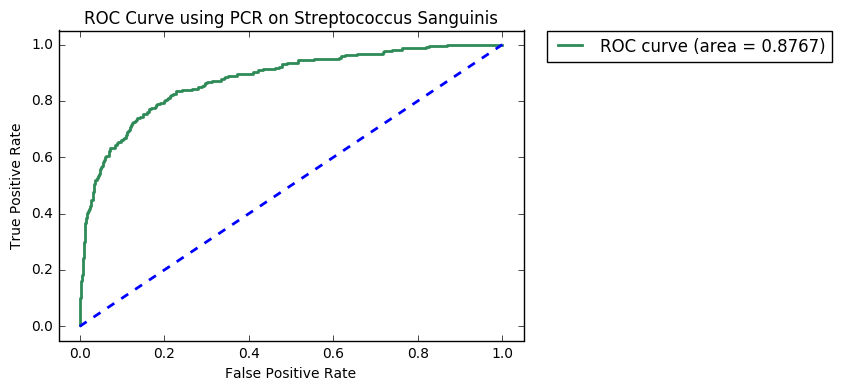

212 MB


In [11]:
# clf=XGBClassifier()
# clf=RandomForestClassifier()
# clf=DecisionTreeClassifier()
# clf=KNeighborsClassifier(n_neighbors = 25)
# clf=GaussianNB()
pca = PCA()
test_data=pca.fit_transform(test_data)
clf=LinearRegression()

# mean_tpr = 0.0
# mean_fpr = np.linspace(0,1,100)


# colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue','red','black','darkgreen','magenta','violet'])

lw = 2
start = timeit.default_timer()
#Compute ROC curve and area the curve
clf.fit(X_train,Y_train)
probas_=clf.predict(test_data)
stop = timeit.default_timer()
print "Time Taken =%f"%(stop-start)
fpr, tpr, thresholds = roc_curve(test_label, probas_)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=lw, color='seagreen',label='ROC curve (area = %0.4f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='blue')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using PCR on Streptococcus Sanguinis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

import resource
print str(resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024) + " MB"

93.981745579
91.8495297806
True Positives 96
Total positives 218
True Negatives 1955
Total negatives 2015


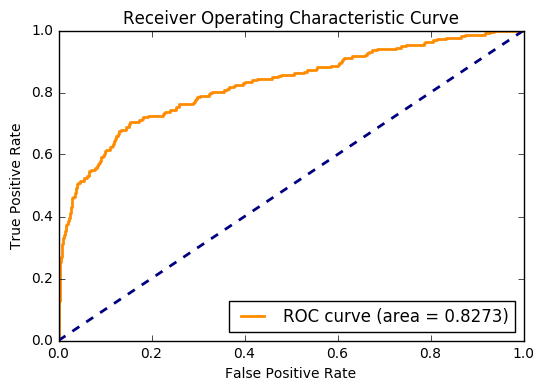

In [12]:
clf=XGBClassifier(max_delta_step=1,max_depth=5,min_child_weight=0.5,gamma=1e-5)
clf.fit(X_train, Y_train)
X_test=test_data
Y_test=test_label
Y_pred=clf.predict_proba(X_test)
pred=clf.predict(X_test)
# print Y_pred
# print Y_test
score=clf.score(X_train,Y_train)
print score*100
# Y_test=Y_test.reshape(835,1)
# pred=pred.reshape(835,1)
accuracy = accuracy_score(Y_test,pred)
print accuracy * 100
i=0
count1=0
count0=0
count00=0
for i in range(len(Y_test)):
    if pred[i]==1 and Y_test[i]==1:
        count1+=1
    if pred[i]==0 and Y_test[i]==0:
        count00+=1
        
print "True Positives" ,count1        
i=0
count=0
for i in range(len(Y_test)):
    if Y_test[i]==1:
        count+=1
    else:
        count0+=1
print "Total positives",count
print "True Negatives",count00
print "Total negatives" ,count0

# Compute ROC curve and ROC area for each class
fpr, tpr,_ = roc_curve(Y_test,Y_pred[:,1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
# cm=confusion_matrix(Y_test,Y_pred)
# TP = cm[0][0]
# FP = cm[0][1]
# FN = cm[1][0]
# TN = cm[1][1]
# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# print "True Positive Rate ",TPR
# print "False Positive Rate ",FPR
# # # Specificity or true negative rate
# # TNR = TN/(TN+FP) 
# # # Precision or positive predictive value
# # PPV = TP/(TP+FP)
# # # Negative predictive value
# # NPV = TN/(TN+FN)
# # # False negative rate
# # FNR = FN/(TP+FN)
# # # False discovery rate
# # FDR = FP/(TP+FP)
# # #This is the ROC curve
# plt.plot(FPR,TPR)
# plt.show() 

# # This is the AUC
# auc = np.trapz(TPR,FPR)

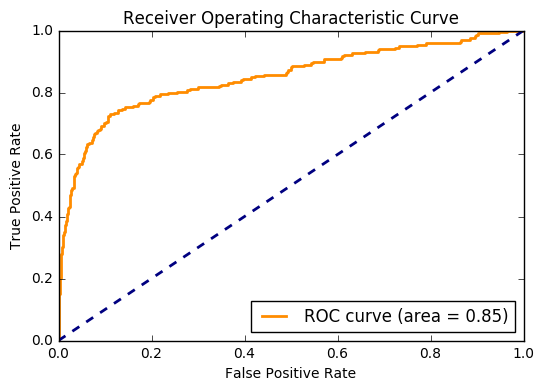

In [14]:
clf=SVC(C=1,probability=True)
clf.fit(X_train,Y_train)
Y_pred=clf.predict_proba(X_test)
#print Y_score
# acc_svc = clf.score(X_train, Y_train) * 100
# print acc_svc
# acc=accuracy_score(Y_test,Y_pred)
# print acc
fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

92.34


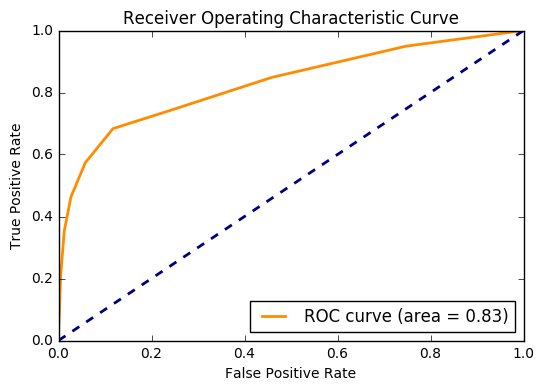

In [15]:
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)
Y_pred=clf.predict_proba(X_test)
acc_svc = round(clf.score(X_test, Y_test) * 100, 2)
print acc_svc
fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

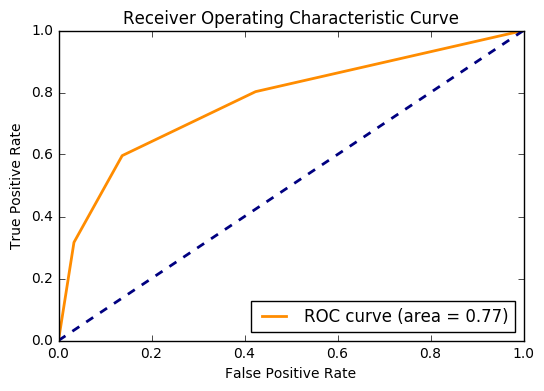

In [16]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict_proba(X_test)
# acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
# acc_knn
fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

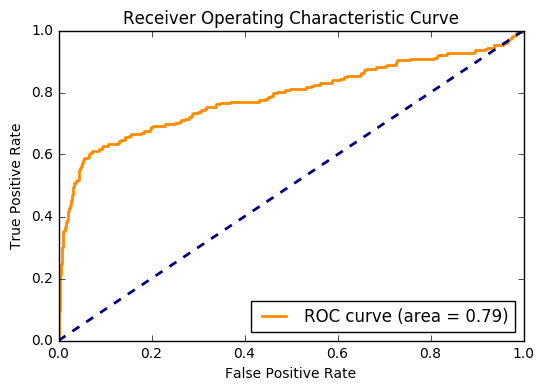

In [17]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict_proba(X_test)
# acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
# acc_gaussian
fpr, tpr,_ = roc_curve(Y_test, Y_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

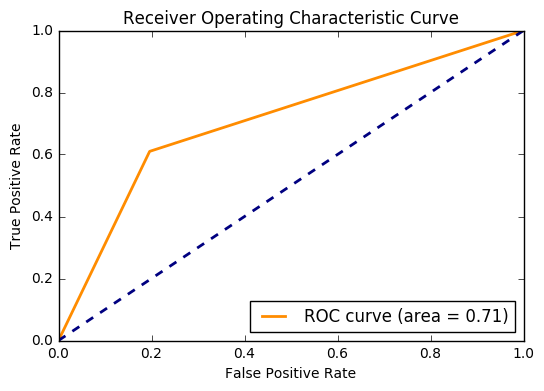

In [18]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron
fpr, tpr,_ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

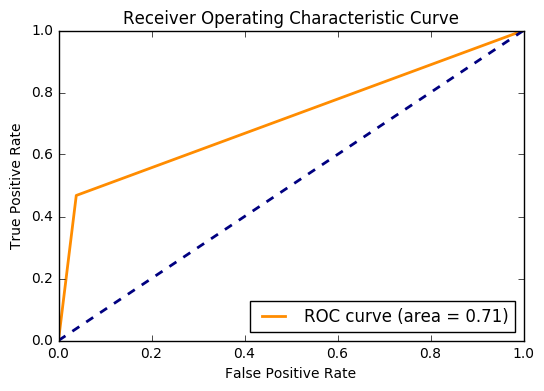

In [19]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test)* 100, 2)
acc_linear_svc
fpr, tpr,_ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

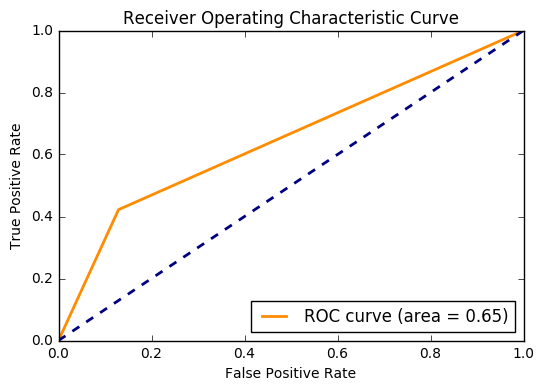

In [20]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd
fpr, tpr,_ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

74.4290192566
(2233,)


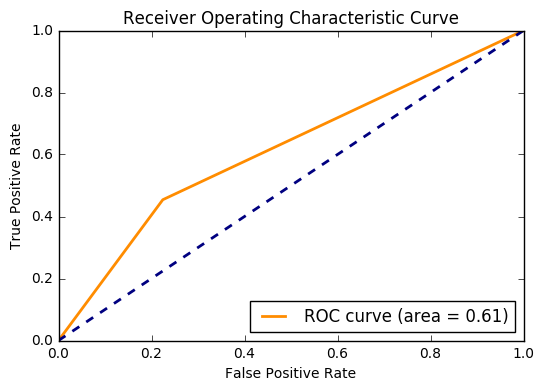

In [21]:
# Decision Tree
clf= DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc=accuracy_score(Y_test,Y_pred)
print acc*100
print Y_pred.shape
#print Y_score.shape
fpr, tpr,_ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [22]:
# roc_auc_score(Y_test,Y_score)
# roc_auc_score
acc_decision_tree = round(clf.score(X_test, Y_test) * 100, 2)
acc=accuracy_score(Y_test,Y_pred)
print acc*100
print acc_decision_tree

74.4290192566
74.43
